In [1]:
import os
import sys
import pandas as pd
#import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
from graph_helpers import *
from helpers import *
from mod_si import *
from plots import *
from find_net_stats import *

/nfs/nfs9/home/nobackup/vakrao/nz_model/src
/nfs/nfs9/home/nobackup/vakrao/nz_model/src


In [2]:
inc_fp = "../params/new_psa.csv"
inc_all = pd.read_csv(inc_fp)
inc_real = list(inc_all["Delta Orchard"])
cum_dat = list(inc_all["Cumulative Orchards"])

# Vary D for best config

In [3]:
vd = "../src/V_A/V_A_vd_s.csv"
vd_s_dat = pd.read_csv(vd)
vd_s_dat = vd_s_dat.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','D':'D (Seasonal)'})
month_x = {0:"None",1:"03/11",2:"04/11",3:"05/11",4:"06/11",5:"07/11",6:"08/11",7:"09/11",8:"10/11",9:"11/11",10:"12/11",11:"01/12",12:"02/12",13:"03/12"}
vd_s_dat["Months"] = [month_x[i] for i in list(vd_s_dat["Months"])]
vd_s_dat["Network Type"] = ["Seasonal" for i in list(vd_s_dat["Months"])]

In [4]:
net_file = "../params/horticulture365_check_NZ.csv"
prop_fp = "../params/2024_prop_dat.csv"
prop_size = read_property_data(prop_fp)
inc_fp  = "../params/new_psa.csv"
post_fp = "sent_post.csv"
in_bond,out_bond = read_network_data(net_file)
eps,pct = 30,0.8
all_s = pd.read_csv("../src/S_C/S_C_lin_S_D.csv")
season_real = find_best_config(all_s,inc_fp,"S",eps,pct)
s_bb,s_bw,s_s = season_real["b_b"],season_real["b_w"],season_real["seed"]
vd_s_dat = vd_s_dat[vd_s_dat["seed"] == s_s]

In [5]:
grouped_dat  = vd_s_dat.groupby(["D (Seasonal)"])
seed_rmse = []
real_inc = pd.read_csv(inc_fp)
real_inc = list(real_inc["Delta Orchard"])
seed_configs = []
counter = 0
inc_dat = []
num_properties = len(set(in_bond.keys()).union(set(out_bond.keys())))
for name,group in grouped_dat:        
    param_cuml = list(group['Cumulative Infections'])
    D = float(name[0])
    for i,p in enumerate(param_cuml):
        if p > 2: 
            print("Outbreak start for : ",D," is :",i)
            break
    max_val = 0
    time = 0
    for i,p in enumerate(calc_month_incidence(param_cuml)):
        if p > max_val:
            max_val = p
            time = i
    print("Max incidence is: ",max_val," at month: ",time)
    print("Cumulative infections for: ",D," is :",param_cuml[-1]/num_properties)
    param_inc = calc_month_incidence(param_cuml)
    param_inc = param_inc[0:]
    inc_dat = inc_dat + param_inc
vd_s_dat["Incidence"] = inc_dat
vd_s_dat = vd_s_dat[vd_s_dat["Months"] != "None"]


Outbreak start for :  0.2  is : 1
Max incidence is:  316.0  at month:  8
Cumulative infections for:  0.2  is : 0.5607189829022359
Outbreak start for :  0.4  is : 2
Max incidence is:  245.0  at month:  8
Cumulative infections for:  0.4  is : 0.5519508987286278
Outbreak start for :  0.6  is : 2
Max incidence is:  246.0  at month:  9
Cumulative infections for:  0.6  is : 0.5436212187637002
Outbreak start for :  0.8  is : 2
Max incidence is:  307.0  at month:  9
Cumulative infections for:  0.8  is : 0.5344147303814116


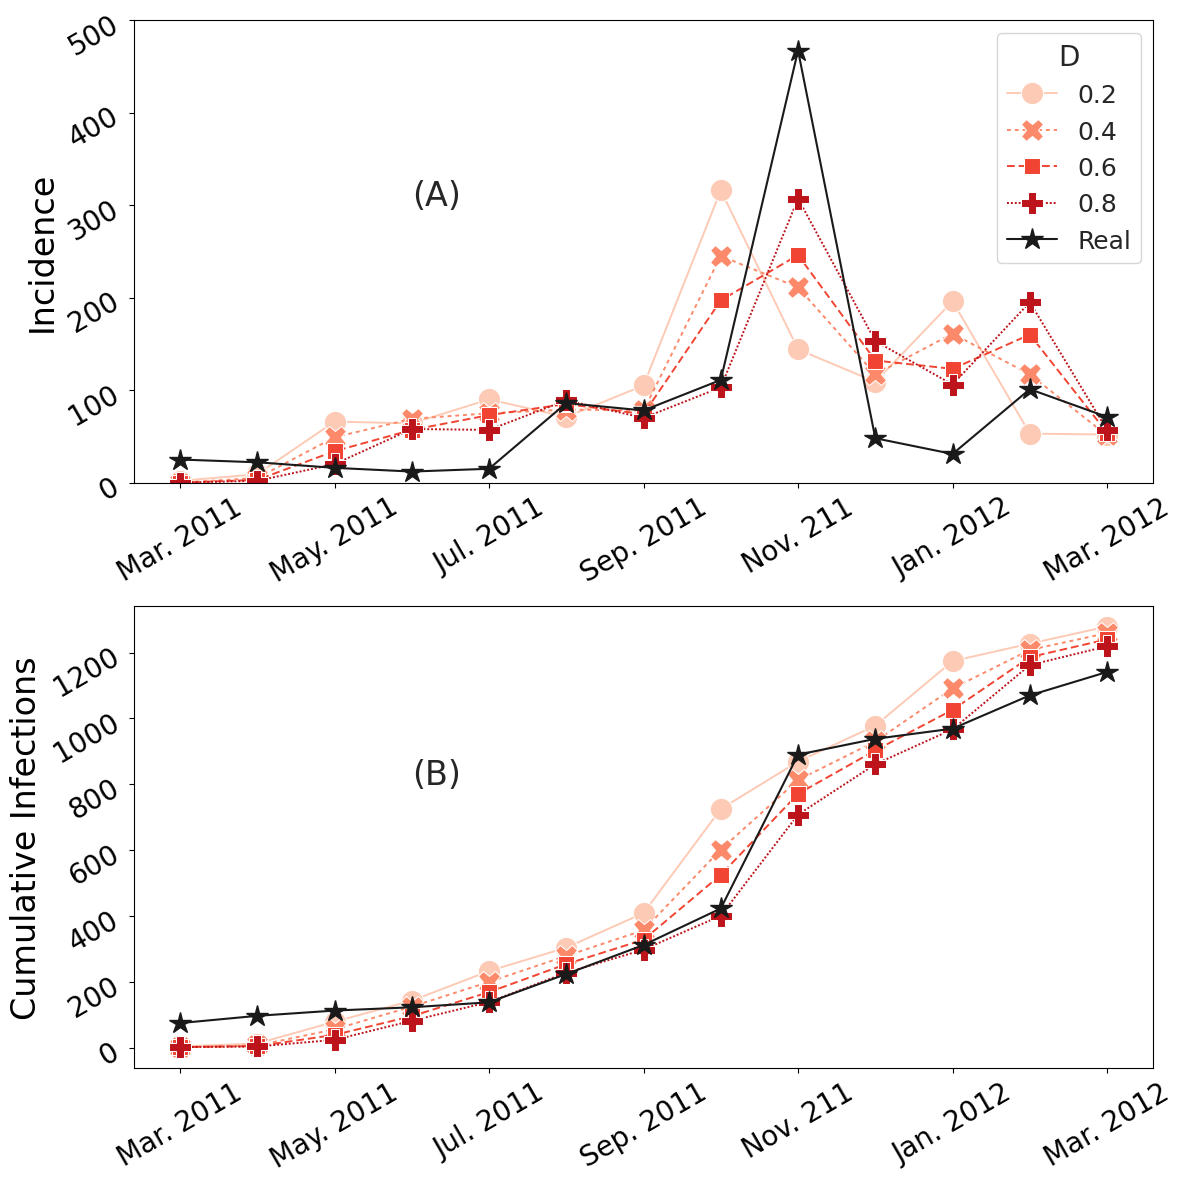

In [6]:

# Assuming vd_s_dat, inc_real, cum_dat are defined elsewhere in your script

# Original data mapping (kept for context, not directly used for ticks)
pruned_month = {0:"03/11",1:"04/11",2:"05/11",3:"06/11",4:"07/11",5:"08/11",6:"09/11",7:"10/11",8:"11/11",9:"12/11",10:"01/12",11:"02/12",12:"03/12"}

# --- Define desired tick positions and labels ---
# These are the numerical indices corresponding to Mar/11, May/11, etc.
tick_positions = [0, 2, 4, 6, 8, 10, 12]
# These are the labels for those specific positions
tick_labels = ["Mar. 2011", "May. 2011", "Jul. 2011", "Sep. 2011", "Nov. 211", "Jan. 2012", "Mar. 2012"]

mark_size = 16
annot_fs,lab_fs =  24,24
leg_title_fs,leg_fs = 20,18
tick_fs = 20
tick_angle = 30
lw_thick = 1.4
seas_palette = {0.2: '#F4A582',0.4: '#FD8D3C',0.6: '#D95F0E',0.8: '#993404'}
seas_palette = sns.color_palette("Reds", n_colors=4)
dashes = {0.2: '',0.4: (2,2),0.6: (4,2),0.8: (1,1)}
line_x,line_y = 12,12
f,axs= plt.subplots(2,1,figsize=(line_x,line_y),tight_layout=True)

sns.set(rc={"figure.figsize":(line_x, line_y)}) #width=6, height=5
axs[0].set_facecolor('white') # Set axes background to white
axs[1].set_facecolor('white') # Set axes background to white

# --- APPLY THE FIX HERE FOR AXS[0] ---
axs[0].set_xticks(tick_positions)      # Set the numerical positions of the ticks
axs[0].set_xticklabels(tick_labels)    # Set the labels for those positions
axs[0].tick_params(rotation=tick_angle,labelsize=tick_fs)
#axs[0].set_xlabel(xlabel="Months",fontsize=lab_fs) # Removed duplicate set_xlabel
axs[0].set_ylabel(ylabel="Incidence",fontsize=lab_fs)

# --- APPLY THE FIX HERE FOR AXS[1] ---
axs[1].set_xticks(tick_positions)      # Set the numerical positions of the ticks
axs[1].set_xticklabels(tick_labels)    # Set the labels for those positions
axs[1].set_ylabel(ylabel="Cumulative Infections",fontsize=lab_fs)
axs[1].tick_params(rotation=tick_angle,labelsize=tick_fs)
#axs[1].set_xlabel(xlabel="Months",fontsize=lab_fs)

# Plotting commands remain the same
sns.lineplot(vd_s_dat,x="Months",y="Incidence",ax=axs[0],style="D (Seasonal)",hue="D (Seasonal)",palette=seas_palette,dashes=dashes,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
sns.lineplot(vd_s_dat,x="Months",y="Cumulative Infections",ax=axs[1],style="D (Seasonal)",hue="D (Seasonal)",palette=seas_palette,dashes=dashes,estimator="mean",markers=True,legend=False,ms=mark_size,lw=lw_thick)
sns.set_style("ticks") # This line might be better placed before creating the subplots if you want it to apply globally
axs[0].plot(list(pruned_month.keys()),inc_real[1:],marker="*",ms=mark_size,color="k",label="Real")
axs[1].plot(list(pruned_month.keys()),cum_dat[1:],marker="*",ms=mark_size,color="k",label="Real")
#f.supxlabel("Time",fontsize=24)

axs[0].set_ylim([0,500])
axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[0].legend(title="D",title_fontsize=leg_title_fs,fontsize=leg_fs)
axs[0].annotate("(A)",(3,300),fontsize=annot_fs)
axs[1].annotate("(B)",(3,800),fontsize=annot_fs)
plt.savefig("figs/vary_D.png")

# Vary L

In [7]:
vl = "../src/V_A/V_A_vl_s.csv"
vl_s_dat = pd.read_csv(vl)
vl_s_dat = vl_s_dat.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','shift':'L'})
month_x = {0:"02/11",1:"03/11",2:"04/11",3:"05/11",4:"06/11",5:"07/11",6:"08/11",7:"09/11",8:"10/11",9:"11/11",10:"12/11",11:"01/12",12:"02/12",13:"03/12"}
vl_s_dat["Months"] = [month_x[i] for i in list(vl_s_dat["Months"])]
vl_s_dat["Network Type"] = ["Seasonal" for i in list(vl_s_dat["Months"])]

In [8]:
net_file = "../params/horticulture365_check_NZ.csv"
prop_fp = "../params/2024_prop_dat.csv"
prop_size = read_property_data(prop_fp)
inc_fp  = "../params/new_psa.csv"
post_fp = "sent_post.csv"
in_bond,out_bond = read_network_data(net_file)
season_real = find_best_config(all_s,inc_fp,"S",eps,pct)
s_bb,s_bw,s_s = season_real["b_b"],season_real["b_w"],season_real["seed"]
#s_bb,s_bw,s_s = .03,.08,21729
vl_s_dat = vl_s_dat[vl_s_dat["seed"] == s_s]

In [9]:
grouped_dat  = vl_s_dat.groupby(["L"])
seed_rmse = []
real_inc = pd.read_csv(inc_fp)
real_inc = list(real_inc["Delta Orchard"])
seed_configs = []
counter = 0
inc_dat = []
for name,group in grouped_dat:
    param_cuml = list(group['Cumulative Infections'])
    D = float(name[0])
    peak_val = 0
    param_inc = calc_month_incidence(param_cuml)

    for i,p in enumerate(param_cuml):
        if p > 2: 
            print("Outbreak start for : ",D," is :",i)
            break
    print("Cumulative infections for: ",D," is :",param_cuml[-1])
    print("max incidence is: ",max(param_inc))
    param_inc = param_inc[0:]
    inc_dat = inc_dat + param_inc
vl_s_dat["Incidence"] = inc_dat

Outbreak start for :  0.0  is : 5
Cumulative infections for:  0.0  is : 583.0
max incidence is:  207.0
Outbreak start for :  1.0  is : 5
Cumulative infections for:  1.0  is : 604.0
max incidence is:  205.0
Outbreak start for :  2.0  is : 5
Cumulative infections for:  2.0  is : 605.0
max incidence is:  204.0
Outbreak start for :  3.0  is : 2
Cumulative infections for:  3.0  is : 1219.0
max incidence is:  307.0
Outbreak start for :  4.0  is : 1
Cumulative infections for:  4.0  is : 1288.0
max incidence is:  265.0
Outbreak start for :  5.0  is : 0
Cumulative infections for:  5.0  is : 1343.0
max incidence is:  251.0
Outbreak start for :  6.0  is : 0
Cumulative infections for:  6.0  is : 1352.0
max incidence is:  232.0


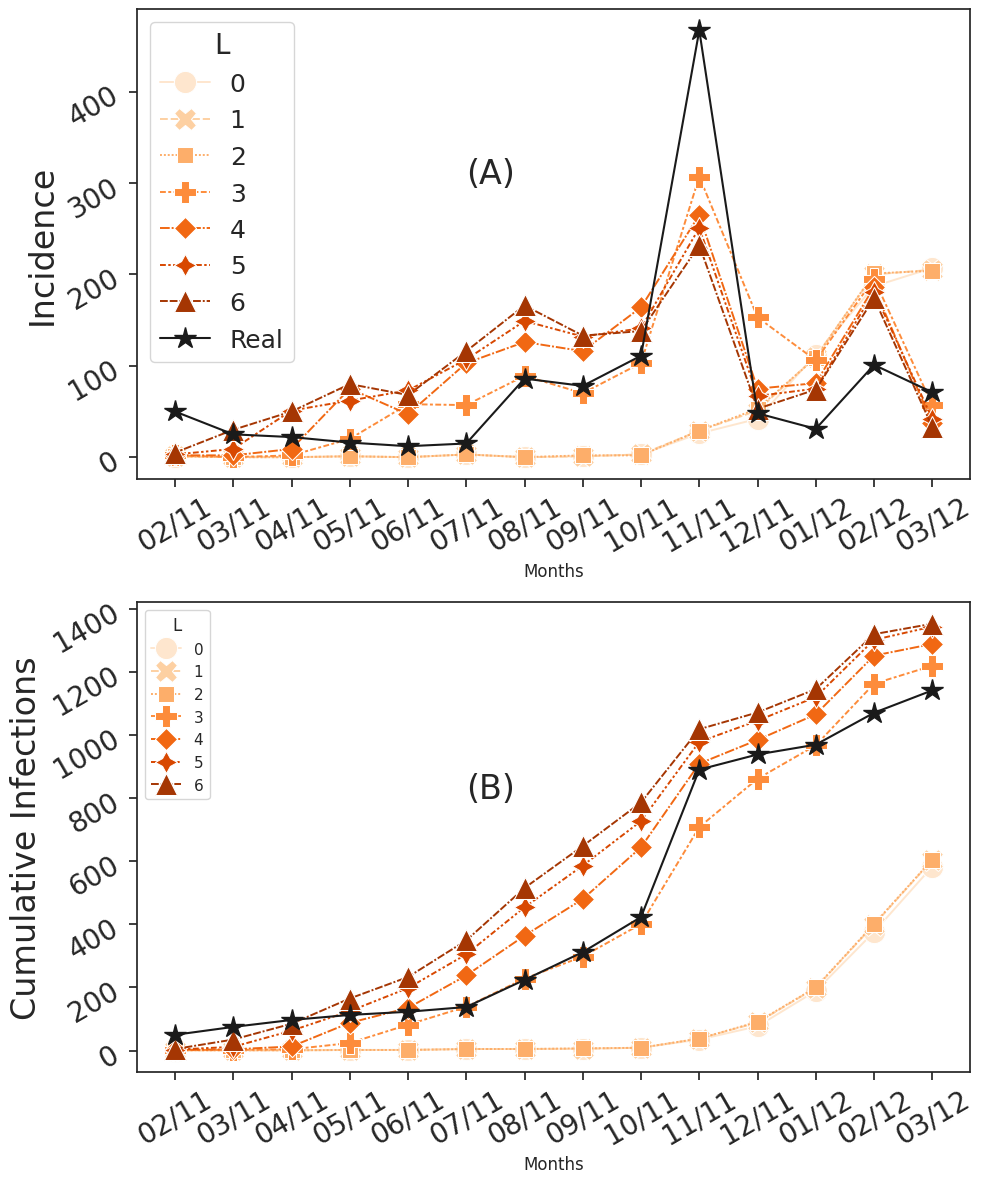

In [10]:
#seas_palette = ["#fdae6b", "#ff7f00", "#d65f00", "#a34700"]
#seas_palette = ['#F4A582', '#FD8D3C', '#D95F0E', '#993404']
mark_size = 16
lw_thick = 1.4
tick_angle = 30
l_palette = sns.color_palette("Oranges", n_colors=7)
line_x,line_y = 10,12
f,axs= plt.subplots(2,1,figsize=(line_x,line_y),tight_layout=True)
#axs[0].set_facecolor('white') 
#axs[1].set_facecolor('white') 
#sns.set(rc={"figure.figsize":(line_x, line_y)}) #width=6, height=5
#axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
#axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
axs[0].tick_params(rotation=tick_angle,labelsize=tick_fs)
axs[1].tick_params(rotation=tick_angle,labelsize=tick_fs)
axs[0].set_ylabel(ylabel="Incidence",fontsize=lab_fs)
axs[1].set_ylabel(ylabel="Cumulative Infections",fontsize=lab_fs)
sns.lineplot(vl_s_dat,x="Months",y="Incidence",ax=axs[0],style="L",hue="L",palette=l_palette,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
sns.lineplot(vl_s_dat,x="Months",y="Cumulative Infections",ax=axs[1],style="L",hue="L",palette=l_palette,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
sns.set_style("ticks")

axs[0].plot(list(month_x.keys()),inc_real,marker="*",ms=mark_size,color="k",label="Real")
axs[1].plot(list(month_x.keys()),cum_dat,marker="*",ms=mark_size,color="k",label="Real")
axs[0].legend(title="L",title_fontsize=20,fontsize=18)
#axs[0].set_facecolor('white') 
axs[0].annotate("(A)",(5,300),fontsize=24)
axs[1].annotate("(B)",(5,800),fontsize=24)
f.savefig("figs/vary_L.png")

# Varying Start Alpha

In [11]:
v_a = "../src/V_A/V_A_valpha_s.csv"
v_a_dat = pd.read_csv(v_a)
v_a_dat = v_a_dat.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','shift':'L'})
month_x = {0:"02/11",1:"03/11",2:"04/11",3:"05/11",4:"06/11",5:"07/11",6:"08/11",7:"09/11",8:"10/11",9:"11/11",10:"12/11",11:"01/12",12:"02/12",13:"03/12"}
v_a_dat["Months"] = [month_x[i] for i in list(v_a_dat["Months"])]
v_a_dat["Network Type"] = ["Seasonal" for i in list(v_a_dat["Months"])]

In [12]:
net_file = "../params/horticulture365_check_NZ.csv"
prop_fp = "../params/2024_prop_dat.csv"
prop_size = read_property_data(prop_fp)
inc_fp  = "../params/new_psa.csv"
post_fp = "sent_post.csv"
in_bond,out_bond = read_network_data(net_file)
season_real = find_best_config(all_s,inc_fp,"S",eps,pct)
s_bb,s_bw,s_s = season_real["b_b"],season_real["b_w"],season_real["seed"]
v_a_dat = v_a_dat[v_a_dat["seed"] == s_s]

In [13]:
grouped_dat  = v_a_dat.groupby(["alpha"])
seed_rmse = []
real_inc = pd.read_csv(inc_fp)
real_inc = list(real_inc["Delta Orchard"])
seed_configs = []
counter = 0
inc_dat = []
for name,group in grouped_dat:
    param_cuml = list(group['Cumulative Infections'])
    D = float(name[0])
    peak_val = 0
    param_inc = calc_month_incidence(param_cuml)

    for i,p in enumerate(param_cuml):
        if p > 2: 
            print("Outbreak start for : ",D," is :",i)
            break
    print("Cumulative infections for: ",D," is :",param_cuml[-1])
    print("max incidence is: ",max(param_inc))
    param_inc = param_inc[0:]
    inc_dat = inc_dat + param_inc
v_a_dat["Incidence"] = inc_dat

Outbreak start for :  0.1  is : 2
Cumulative infections for:  0.1  is : 1219.0
max incidence is:  307.0
Outbreak start for :  0.3  is : 2
Cumulative infections for:  0.3  is : 1253.0
max incidence is:  292.0
Outbreak start for :  0.5  is : 2
Cumulative infections for:  0.5  is : 1265.0
max incidence is:  278.0
Outbreak start for :  0.7  is : 1
Cumulative infections for:  0.7  is : 1267.0
max incidence is:  267.0
Outbreak start for :  0.9  is : 1
Cumulative infections for:  0.9  is : 1273.0
max incidence is:  261.0


/tmp/ipykernel_339942/2005839322.py:27: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.lineplot(v_a_dat,x="Months",y="Incidence",ax=axs[0],style="alpha",hue="alpha",palette=l_palette,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
/tmp/ipykernel_339942/2005839322.py:28: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.lineplot(v_a_dat,x="Months",y="Cumulative Infections",ax=axs[1],style="alpha",hue="alpha",palette=l_palette,estimator="mean",markers=True,legend=False,ms=mark_size,lw=lw_thick)


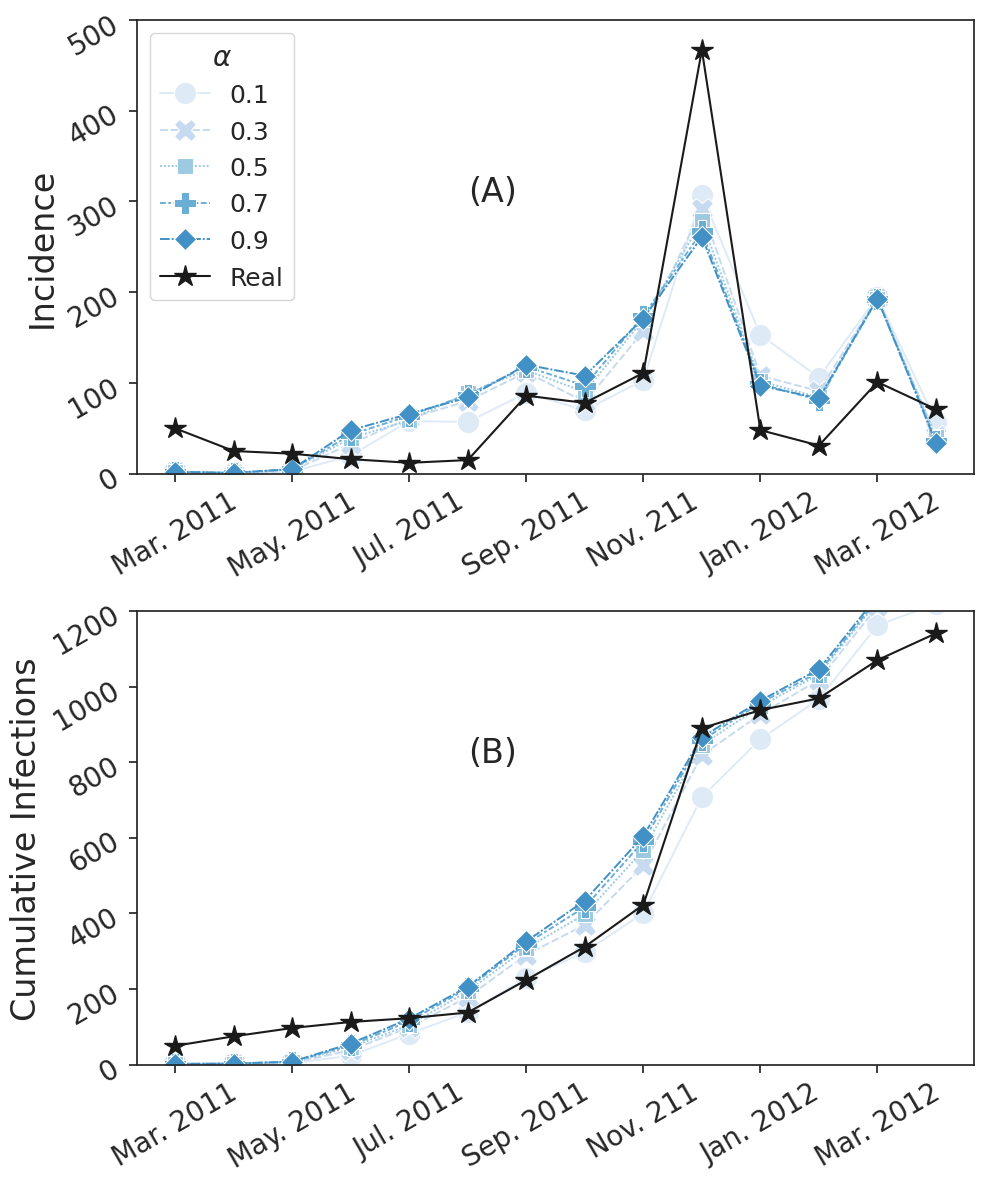

In [14]:
#seas_palette = ["#fdae6b", "#ff7f00", "#d65f00", "#a34700"]
#seas_palette = ['#F4A582', '#FD8D3C', '#D95F0E', '#993404']
mark_size = 16
lw_thick = 1.4
l_palette = sns.color_palette("Blues", n_colors=7)
line_x,line_y = 10,12
f,axs= plt.subplots(2,1,figsize=(line_x,line_y),tight_layout=True)
#axs[0].set_facecolor('white') 
#axs[1].set_facecolor('white') 
#sns.set(rc={"figure.figsize":(line_x, line_y)}) #width=6, height=5
#axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
#axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
# --- APPLY THE FIX HERE FOR AXS[0] ---
axs[0].set_xticks(tick_positions)      # Set the numerical positions of the ticks
axs[0].set_xticklabels(tick_labels)    # Set the labels for those positions
axs[0].tick_params(rotation=tick_angle,labelsize=tick_fs)
#axs[0].set_xlabel(xlabel="Months",fontsize=lab_fs) # Removed duplicate set_xlabel
axs[0].set_ylabel(ylabel="Incidence",fontsize=lab_fs)

# --- APPLY THE FIX HERE FOR AXS[1] ---
axs[1].set_xticks(tick_positions)      # Set the numerical positions of the ticks
axs[1].set_xticklabels(tick_labels)    # Set the labels for those positions
axs[1].set_ylabel(ylabel="Cumulative Infections",fontsize=lab_fs)
axs[1].tick_params(rotation=tick_angle,labelsize=tick_fs)
#axs[1].set_xlabel(xlabel="Months",fontsize=lab_fs)

sns.lineplot(v_a_dat,x="Months",y="Incidence",ax=axs[0],style="alpha",hue="alpha",palette=l_palette,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
sns.lineplot(v_a_dat,x="Months",y="Cumulative Infections",ax=axs[1],style="alpha",hue="alpha",palette=l_palette,estimator="mean",markers=True,legend=False,ms=mark_size,lw=lw_thick)
sns.set_style("ticks")
axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[0].plot(list(month_x.keys()),inc_real,marker="*",ms=mark_size,color="k",label="Real")
axs[1].plot(list(month_x.keys()),cum_dat,marker="*",ms=mark_size,color="k",label="Real")
axs[0].legend(title=r"$\alpha$",title_fontsize=20,fontsize=18)
#axs[1].legend(title=r"$alpha$",title_fontsize=20,fontsize=18)
#axs[0].set_facecolor('white') 
axs[0].set_ylim([0,500])
axs[1].set_ylim([0,1200])

axs[0].annotate("(A)",(5,300),fontsize=annot_fs)
axs[1].annotate("(B)",(5,800),fontsize=annot_fs)
f.savefig("figs/vary_alpha.png")

# Varying Start Month

In [15]:
month_fp = "../src/M_C/M_C_lin_M_D.csv"
month_dat = pd.read_csv(month_fp)
month_real = find_best_config(month_dat,inc_fp,"M",eps,pct)
m_bb,m_bw,m_D = month_real["b_b"],month_real["b_w"],month_real["D"]
m_vsm = pd.read_csv(month_fp)
# get us what the filtered seeds were 
m_vsm = m_vsm[m_vsm['b_b'] == m_bb]
m_vsm = m_vsm[m_vsm['b_w'] == m_bw]
m_vsm = m_vsm[m_vsm['D'] == m_D] 

In [16]:
# filter dataset by seeds that match real data
grouped_dat  = m_vsm.groupby(["seed"])
good_seeds = set(m_vsm["seed"])

In [17]:
month_vsm = "../src/V_A/V_A_vsm_m.csv"
month_vsm = pd.read_csv(month_vsm)
month_vsm = month_vsm.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','shift':'L'})
month_x = {0:"02/11",1:"03/11",2:"04/11",3:"05/11",4:"06/11",5:"07/11",6:"08/11",7:"09/11",8:"10/11",9:"11/11",10:"12/11",11:"01/12",12:"02/12",13:"03/12"}
month_vsm["Months"] = [month_x[i] for i in list(month_vsm["Months"])]
month_vsm["Network Type"] = ["Seasonal" for i in list(month_vsm["Months"])]
season = {12:"SM",1:"SM",2:"SM",3:"AT",4:"AT",5:"AT",6:"WT",7:"WT",8:"WT",9:"SP",10:"SP",11:"SP"}
#month_vsm["Season"] = [season[s] for s in list(month_vsm["sm"])]
month_vsm = month_vsm.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','shift':'L'})
month_x = {0:"1",1:"2",2:"3",3:"4",4:"5",5:"6",6:"7",7:"8",8:"9",9:"10",10:"11",11:"12",12:"13",13:"14"}
month_vsm = month_vsm[month_vsm["seed"].isin(good_seeds)]
month_vsm = month_vsm[month_vsm["alpha"] == 0.1]

In [18]:
print(len(set(month_vsm["seed"])))

1300


In [19]:
# filter dataset by seeds that match real data
grouped_dat  = month_vsm.groupby(["sm","seed","alpha"])
seed_rmse = []
real_inc = pd.read_csv(inc_fp)
real_inc = list(real_inc["Delta Orchard"])
seed_configs = []
counter = 0
out_size = 2
inc_dat = []
peak_vsm,os_sm,tp_sm,st_sm,prob_out = {},{},{},{},{}
for i in range(1,13):
    peak_vsm[i] = []
    os_sm[i] = []
    tp_sm[i] = []
    st_sm[i] = []
    #peak_inc[i] = []
    prob_out[i] = 0

for name,group in grouped_dat:
    sm,seed,alpha = name[0],name[1],name[2]
    if seed in good_seeds and alpha == 0.1:
        param_cuml = list(group['Cumulative Infections'])
        param_cuml = param_cuml[1:]
        found_st = False
        for i,p in enumerate(param_cuml):
            # find when outbreak size
            # is greater than 2 - when it starts!
            if p >= 2 and found_st == False: 
                # add one since i is indexed at 0
                st_sm[sm].append(i+1)
                found_st = True
        os_sm[sm].append(param_cuml[-1])
        if param_cuml[-1] > out_size:
            prob_out[sm] += 1
        D = float(name[0])
        param_inc = calc_month_incidence(param_cuml)
        max_p = max(param_inc)
        peak_vsm[sm].append(max_p)
        for i,p in enumerate(param_inc):
            if p == max_p:
                tp_sm[sm].append(i)
                break
        
        inc_dat = inc_dat + param_inc
#month_vsm["Incidence"] = inc_dat

In [20]:
print(len(os_sm[1]))
print(len(peak_vsm[1]))

1300
1300


In [21]:
full_os_data = os_sm
full_pi_data = peak_vsm

In [22]:
x_vals = list(peak_vsm.keys())
peak_std,peak_mn,os_mn,os_std,tp_std,st_std = {},{},{},{},{},{}
for p in peak_vsm:
    prob_out[p] = prob_out[p]/len(os_sm[p])
    peak_std[p] = np.std(peak_vsm[p])
    peak_mn[p] = np.median(peak_vsm[p])
    os_std[p] = np.std(os_sm[p])
    os_mn[p] = np.mean(os_sm[p])
    tp_std[p] = np.std(tp_sm[p])
    tp_sm[p] = np.mean(tp_sm[p])
    # outbreak start month
    st_std[p] = np.std(st_sm[p])
    st_sm[p] = np.mean(st_sm[p])
print(st_sm)
peak_months = {}
start_months = {}
peak_next_year = []
st_next_year = []
for x in tp_sm:
    peak_val = (tp_sm[x])
    os_start = (st_sm[x])
    peak_month = peak_val + x
    start_month = os_start + x
    if (peak_month) > 12:
        peak_month = (peak_month - 12)
        peak_next_year.append(True)
    else:
        peak_next_year.append(False)
    if (start_month) > 12:
        start_month = (start_month -12)
        st_next_year.append(True)
    else:
        st_next_year.append(False)
    peak_months[x] = peak_month   
    start_months[x] = start_month

# Convert to lists
month = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
print(start_months)
peak_vals = [peak_mn[m] for m in x_vals]
os_vals = [os_mn[m] for m in x_vals]
tp_vals = [int(peak_months[m]) for m in x_vals]  # 1..12 numeric positions
st_vals = [int(start_months[m]) for m in x_vals]
peak_stds = [peak_std[m] for m in x_vals]
os_stds = [os_std[m] for m in x_vals]
tp_stds = [tp_std[m] for m in x_vals]
st_stds = [st_std[m] for m in x_vals]

{1: 2.9906396255850236, 2: 3.0967238689547583, 3: 3.1981279251170047, 4: 3.5561622464898597, 5: 3.856474258970359, 6: 4.027301092043682, 7: 3.7379095163806553, 8: 3.4758190327613105, 9: 3.3065522620904835, 10: 2.998439937597504, 11: 2.870514820592824, 12: 2.858814352574103}
{1: 3.9906396255850236, 2: 5.096723868954758, 3: 6.198127925117005, 4: 7.55616224648986, 5: 8.856474258970358, 6: 10.027301092043682, 7: 10.737909516380656, 8: 11.475819032761311, 9: 0.30655226209048436, 10: 0.998439937597503, 11: 1.870514820592824, 12: 2.858814352574104}


In [23]:
print(tp_vals)
print(x_vals)

[8, 9, 10, 0, 1, 2, 3, 4, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [24]:
print(st_vals)

[3, 5, 6, 7, 8, 10, 10, 11, 0, 0, 1, 2]


In [25]:
print(tp_sm)

{1: 7.503076923076923, 2: 7.697692307692308, 3: 7.875384615384616, 4: 8.222307692307693, 5: 8.557692307692308, 6: 8.599230769230768, 7: 8.316923076923077, 8: 8.016923076923076, 9: 7.610769230769231, 10: 7.4338461538461535, 11: 7.256923076923077, 12: 7.266923076923077}


In [26]:
print(peak_vals)

[207.0, 215.0, 243.0, 262.0, 267.0, 268.0, 272.0, 278.0, 264.5, 261.0, 239.0, 217.0]


In [27]:
print(peak_stds)

[90.21749087162421, 97.55383114468606, 104.90390332368182, 114.6637909758209, 121.10576813082115, 123.2383083139925, 122.02750951850956, 117.8157248799755, 115.13387698752055, 108.15662371693261, 99.50868938894395, 90.86504727328507]


In [28]:
# 0) Filter seeds first (keep all alphas so you can compare them)
filtered = month_vsm[month_vsm["seed"].isin(good_seeds)].copy()
filtered = filtered[filtered["alpha"] == 0.1]

# 1) Get the last row per (alpha, sm, seed)
# Create a within-group index (0..T-1), then pick the max index row
filtered["t"] = filtered.groupby(["alpha", "sm", "seed"]).cumcount()
last_rows_idx = filtered.groupby(["alpha", "sm", "seed"])["t"].idxmax()
last_rows = filtered.loc[last_rows_idx, ["alpha", "sm", "seed", "Cumulative Infections"]]
# 2) Aggregate across seeds to get one value per (alpha, sm)
os_mean = (last_rows
           .groupby(["alpha", "sm"])["Cumulative Infections"]
           .mean()
           .reset_index())
# 3) Prepare month order and labels
sm_order = list(range(1, 13))  # 1..12 start months
month_labels = ["Dec","Jan","Feb","Mar","Apr","May","Jun",
                "Jul","Aug","Sep","Oct","Nov"]

# Pivot to columns = alpha, rows = sm (ordered 1..12)
os_piv = (os_mean.pivot(index="sm", columns="alpha", values="Cumulative Infections"))

#os_std  = os_stats.pivot(index="sm", columns="alpha", values="std").reindex(sm_order)
alphas = list(os_piv.columns)  # your 3 alpha values from the data
x = np.arange(len(sm_order))
bar_width = 0.8 / max(1, len(alphas))  # fit groups nicely

In [29]:
# Mean and std of final outbreak size (last value per seed)
os_stats = (last_rows
            .groupby(["alpha", "sm"])["Cumulative Infections"]
            .agg(['mean','std'])
            .reset_index())
# Pivot to separate alpha columns
os_mean = os_stats.pivot(index="sm", columns="alpha", values="mean").reindex(sm_order)
os_std  = os_stats.pivot(index="sm", columns="alpha", values="std").reindex(sm_order)

In [30]:
def reorder_axes(month_vals,x_vals,next_year):
    start_counter = 0
    for i,n in enumerate(next_year):
        if n == True:
            start_counter=  i
            break
    reorder_vals = month_vals[start_counter:] + month_vals[:start_counter]
    reorder_mths = x_vals[start_counter:] + x_vals[:start_counter]
    return reorder_vals,reorder_mths

In [31]:
print(st_vals)
print(tp_sm)

[3, 5, 6, 7, 8, 10, 10, 11, 0, 0, 1, 2]
{1: 7.503076923076923, 2: 7.697692307692308, 3: 7.875384615384616, 4: 8.222307692307693, 5: 8.557692307692308, 6: 8.599230769230768, 7: 8.316923076923077, 8: 8.016923076923076, 9: 7.610769230769231, 10: 7.4338461538461535, 11: 7.256923076923077, 12: 7.266923076923077}


In [32]:
x_vals = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
reord_st_val = list(st_sm.values())
reord_st_x = x_vals
reord_peak_x = x_vals
reord_tp_val = list(tp_sm.values())
#reord_st,reord_st_x = reorder_axes(st_vals,x_vals,st_next_year)
#reord_peak,reord_peak_x =  reorder_axes(tp_vals,x_vals,peak_next_year)
#reord_st_val,_ = reorder_axes(list(st_sm.values()),x_vals,st_next_year)
#reord_tp_val,_ =  reorder_axes(list(tp_sm.values()),x_vals,peak_next_year)
#reord_st_val = list(st_sm.values())
#reord_tp_val = list(tp_sm.values())

In [33]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

In [34]:
def print_stats(in_data,out_data,tau):
    node_num = set(in_data.keys()).union(set(out_data.keys()))
    in_link_amount,out_link_amount = 0,0
    avg_deg = 0 
    avg_in_weight,avg_out_weight = 0,0
    in_link_amount = 0 
    out_link_amount = 0
    total_moves = 0 
    avg_strength = 0
    avg_in_strg_list = []
    num_in_link = 0
    for l in in_data:
        #node_deg += len(in_data[l])
        move_per_link = 0
        for node in in_data[l]:
            in_link_amount += 1
            total_moves += in_data[l][node]
            move_per_link += in_data[l][node]
    avg_in_weight = move_per_link/in_link_amount
    num_out_link = 0  
    for l in out_data:
        num_out_link += len(out_data[l])
        for node in out_data[l]:
            avg_out_weight += (out_data[l][node]/tau)
            out_link_amount += 1
    avg_out_weight = avg_out_weight / (out_link_amount)
    avg_deg = num_in_link/(len(in_data)*1.0)
    return len(node_num),num_out_link,num_in_link,avg_deg,avg_in_weight,avg_out_weight,total_moves

In [35]:
### now, we find monthly statistics
months = 12
tau = 30
avg_N = 0
avg_OL = 0
avg_K = 0
avg_IW = 0
avg_OW = 0
all_N,all_OL,all_K,all_IW,all_OW,all_TM = [],[],[],[],[],[]
m_vals = [12,1,2,3,4,5,6,7,8,9,10,11]
for m in m_vals:
    fn = str(m)
    if m < 10:
        fn = "0"+str(m)
    fn = "../params/new_month_tau/"+fn+"_2022.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    N,OL,IL,K,IW,OW,TM = print_stats(in_data,out_data,tau)
    avg_N += N
    avg_OL += OL
    avg_K += K
    avg_IW += IW
    avg_OW += OW
    all_N.append(N)
    all_OL.append(OL)
    all_IW.append(IW)
    all_OW.append(OW)
    all_K.append(K)
    all_TM.append(TM)

avg_N = avg_N/months
avg_OW = avg_OW/months
avg_OL = avg_OL/months
avg_K = avg_K/months
avg_IW = avg_IW/months

var_N = np.var(all_N)
var_OW = np.var(all_OW)
var_K = np.var(all_K)

In [36]:
print(all_TM)
month_N = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
summer,fall,winter,spring = "#FFC20A","#D55E00","#0C7BDC","#009E73"
move_colors  = [summer,summer,summer,fall,fall,fall,winter,winter,winter,spring,spring,spring]

leg_fs = 16
x_fs,y_fs = 20,20
tick_angle = 30
sup_font = 24

handles = [
    Patch(facecolor=summer, label="Summer"),
    Patch(facecolor=fall, label="Fall"),
    Patch(facecolor=spring, label="Spring"),
    Patch(facecolor=winter, label="Winter")
]

[7780.0, 6190.0, 10785.0, 10200.0, 6880.0, 5449.0, 4202.0, 4323.0, 6221.0, 5967.0, 8183.0, 10444.0]


In [37]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

seas_month = {"Jan":"Summer","Feb":"Summer",
              "Mar":"Fall","Apr":"Fall",
              "May":"Fall",
              "Jun":"Winter","Jul":"Winter","Aug":"Winter",
              "Sep":"Spring","Oct":"Spring","Nov":"Spring",
              "Dec":"Summer"}

tp_year = ['o' for x in tp_vals]
os_year = ['o' for x in tp_vals]
annotate_x = -3.8 
for i,change in enumerate(peak_next_year):
    if change:
        tp_year[i] = 'x'
for i,change in enumerate(st_next_year):
    if change:
        os_year[i] = 'x'
summer = "#FFC20A"
fall = "#D55E00"
winter = "#0C7BDC"
spring = "#009E73"
colors  = [summer,summer,summer,fall,fall,fall,winter,winter,winter,spring,spring,spring]
tick_fs = 16
title_fs = 20
lab_fs = 18
annot_fs = 24
fig_x,fig_y = 15,10
ab_annot = (0.05,0.9)
cd_annot = (-0.75,11)
tick_angle = 30
# Create the 2x2 plot

[1218.5 1275.5 1362.  1421.5 1391.  1243.  1094.5 1095.5 1121.  1116.
 1157.  1202. ]
[2.9906396255850236, 3.0967238689547583, 3.1981279251170047, 3.5561622464898597, 3.856474258970359, 4.027301092043682, 3.7379095163806553, 3.4758190327613105, 3.3065522620904835, 2.998439937597504, 2.870514820592824, 2.858814352574103]


/tmp/ipykernel_339942/4101986604.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(x_vals)
/tmp/ipykernel_339942/4101986604.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(x_vals)


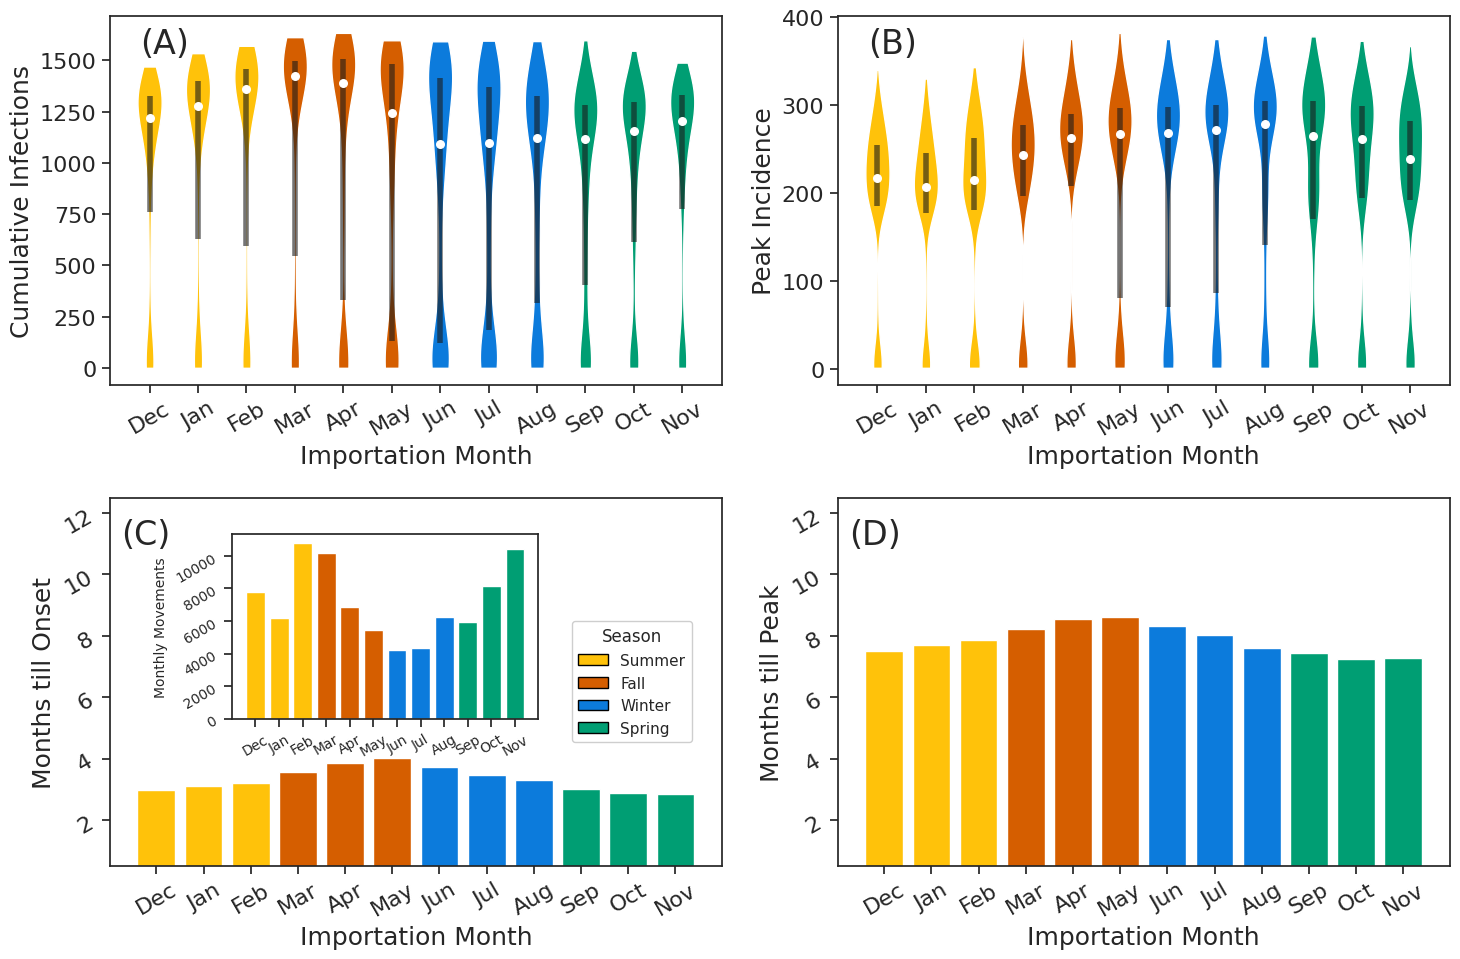

In [39]:
# Distinct, dense hatch patterns for alpha (repeat chars for density)
## DRAW VIOLIN PLOT 
fig, axs = plt.subplots(2, 2, figsize=(fig_x,fig_y))
violin_data = [] 
violin_pi = []

for i in range(1,13):
    if i == 1: 
        violin_data.append(full_os_data[12])
        violin_pi.append(full_pi_data[12])
    if i != 12:
        violin_data.append(full_os_data[i])
        violin_pi.append(full_pi_data[i])

violin_parts = axs[0,0].violinplot(violin_data,showmeans=False, showmedians=False,
        showextrema=False,bw_method='silverman')
violin_pi_parts = axs[0,1].violinplot(violin_pi,showmeans=False, showmedians=False,
        showextrema=False,bw_method='silverman')
counter = 0 
for pc in violin_parts['bodies']:
    pc.set_facecolor(colors[counter])
    pc.set_alpha(1)
    counter += 1
counter = 0
for pc in violin_pi_parts['bodies']:
    pc.set_facecolor(colors[counter])
    pc.set_alpha(1)
    counter += 1
#violin_parts['cmeans'].set_color('black')
quartile1, medians, quartile3 = np.percentile(violin_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(violin_data, quartile1, quartile3)])


whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
print(medians)
inds = np.arange(1, len(medians) + 1)
axs[0,0].scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
axs[0,0].vlines(inds, quartile1, quartile3, color='k', linestyle='-', alpha=0.6,lw=4)
axs[0,0].set_xticklabels(x_vals)

# Center ticks
axs[0,0].set_ylabel("Cumulative Infections", size=lab_fs)
axs[0,0].tick_params(labelsize=tick_fs)
axs[0,0].set_xticks(np.arange(1, len(month_labels) + 1), labels=month_labels,rotation=tick_angle)
axs[0,0].set_ylabel("Cumulative Infections", size=lab_fs)
axs[0,0].set_xlabel("Importation Month", size=lab_fs)
axs[0,0].tick_params(labelsize=tick_fs)
axs[0,0].annotate("(A)", ab_annot, xycoords="axes fraction", fontsize=annot_fs,annotation_clip=False)


# --- Legend 2: Seasons (color only)
# Map your seasonal colors to labels (adjust if your mapping differs)
season_colors = {
    "Summer": summer,
    "Fall":   fall,
    "Winter": winter,
    "Spring": spring,
}

season_handles = [
    Patch(facecolor=c, edgecolor='black', label=lab)
    for lab, c in season_colors.items()
]
quartile1, medians, quartile3 = np.percentile(violin_pi, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(violin_pi, quartile1, quartile3)])

# Now, graph Peak Incidence Size
inds = np.arange(1, len(medians) + 1)
axs[0,1].scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
axs[0,1].vlines(inds, quartile1, quartile3, color='k', linestyle='-', alpha=0.6,lw=4)
axs[0,1].set_xticklabels(x_vals)
# Center ticks
axs[0,1].tick_params(labelsize=tick_fs)
axs[0,1].annotate("(B)", ab_annot, xycoords="axes fraction", fontsize=annot_fs,annotation_clip=False)

season_handles = [
    Patch(facecolor=c, edgecolor='black', label=lab)
    for lab, c in season_colors.items()
]


# Season legend (colors) below the alpha legend (also outside)
leg_season = axs[1,0].legend(
    handles=season_handles, title="Season",
    loc="center right", frameon=True, framealpha=0.95, borderaxespad=2
)
#axs[0].set_xticks(x + (len(alphas)-1)*bar_width/2)  # center tick under group
axs[0,1].set_xticks(np.arange(1, len(month_labels) + 1), labels=month_labels,rotation=tick_angle)
axs[0,1].set_ylabel("Peak Incidence", size=lab_fs)
axs[0,1].set_xlabel("Importation Month", size=lab_fs)
axs[0,1].tick_params(labelsize=tick_fs)

# Onset Time
st_colors = [season_colors[seas_month[m]] for m in reord_st_x] 
print(reord_st_val)
axs[1,0].bar(x_vals,reord_st_val,color=colors)
axs[1,0].tick_params(labelsize=tick_fs,rotation=tick_angle)
axs[1,0].set_xlabel("Importation Month", size=lab_fs)
axs[1,0].set_ylabel("Months till Onset",size=lab_fs)
axs[1,0].annotate("(C)",cd_annot,fontsize=annot_fs,annotation_clip=False)
axs[1,0].set_ylim(0.5, 12.5)  # so Jan/Dec aren’t squished on the frame
ins_ax = axs[1,0].inset_axes([.2, .4, .5, .5],)
x_fs = 10
sup_font = 10
ins_ax.bar(x_vals,all_TM,color=move_colors)
ins_ax.tick_params(labelsize=x_fs,rotation=tick_angle)
ins_ax.set_ylabel("Monthly Movements",size=sup_font)
ins_ax.tick_params(labelsize=x_fs,rotation=tick_angle)

# Peak Timing
peak_colors = [season_colors[seas_month[m]] for m in reord_peak_x] 
axs[1,1].bar(x_vals,reord_tp_val,color=colors)
axs[1,1].tick_params(labelsize=tick_fs,rotation=tick_angle)
axs[1,1].set_xlabel("Importation Month", size=lab_fs)
axs[1,1].set_ylabel('Months till Peak',size=lab_fs)
axs[1,1].annotate("(D)",cd_annot,fontsize=annot_fs,annotation_clip=False)
axs[1,1].set_ylim(0.5, 12.5)  # so Jan/Dec aren’t squished on the frame


# Probability of Outbreak Occuring
probs = list(prob_out.values())
probs = [round(p,2) for p in probs]
sns.set_style("ticks")
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig("figs/vary_C.png")
plt.show()